## Final Project Submission

Please fill out:
* Student name: Henry Van Gorp
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni
* Blog post URL: TBD


# Business Understanding

A real estate investment company which is new to the northwest is looking to understand how the homes in King County, Washington are being sold.  They are looking to understand how the attributes of a home increase the sale price. 

# Data Understanding

The data which is being utlized for this project focuses

### Import Packages

In [304]:
import warnings
warnings.filterwarnings('ignore')

In [305]:
# import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./data/kc_house_data.csv")

data.reset_index(inplace = True)

In [306]:
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [307]:
data.describe()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preparation

### Data Info

Looking at null values, data types and column names

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  object 
 10  view           21534 non-null  object 
 11  condition      21597 non-null  object 
 12  grade          21597 non-null  object 
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

### Check Null Values

An overview of null values in the datasets columns.

In [309]:
data.isna().sum()

index               0
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Clean Data

### Squarefeet Basement

Squarefeet basement was listed as an object.  To make clean this category we replaced the '?" will null values.  After changing the dat type from an object to a float we filled the null values with the mean of the overall column.  Rather than determining if there is a basement or not, we kept the square footage to see if price goes up with square footage.

In [310]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
2500.0        1
243.0         1
1525.0        1
2120.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [311]:
data['sqft_basement'].replace('?',np.nan,inplace=True)

In [312]:
data.sqft_basement = data.sqft_basement.astype("float")

In [313]:
data.sqft_basement.fillna(data['sqft_basement'].mean(),inplace=True)

### Waterfront

Waterfront had null values.  The assumption is that null values represent that there is no waterfront.
Renamed yes to waterfront as 1 and no to waterfront as 0.

In [314]:
data['waterfront'].value_counts(normalize=True)

NO     0.992404
YES    0.007596
Name: waterfront, dtype: float64

In [315]:
data['waterfront'].fillna('NO', inplace=True)

In [316]:
data['waterfront'] = data.waterfront.map({'NO': 0, 'YES': 1})

In [317]:
data['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

### Renovated

Change the structure of the data to represent 1 as renovated and 0 as not renovated.  Null values were changed to not renovated under assumption.

In [318]:
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [319]:
data['yr_renovated'].fillna(0.0, inplace=True)

In [320]:
data['yr_renovated']=data['yr_renovated'].apply(lambda x: 1 if x!=0 else x)

In [321]:
data['yr_renovated'].value_counts()

0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

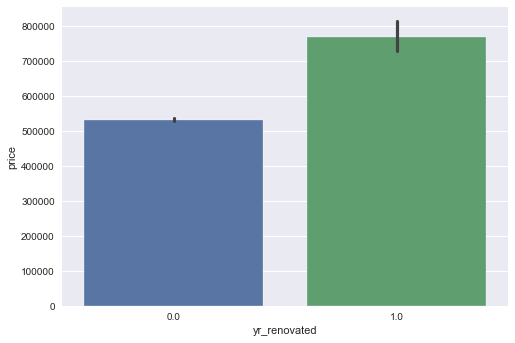

In [322]:
sns.barplot(x = 'yr_renovated', y = 'price', data=data)

### View

In [323]:
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

<AxesSubplot:xlabel='view', ylabel='price'>

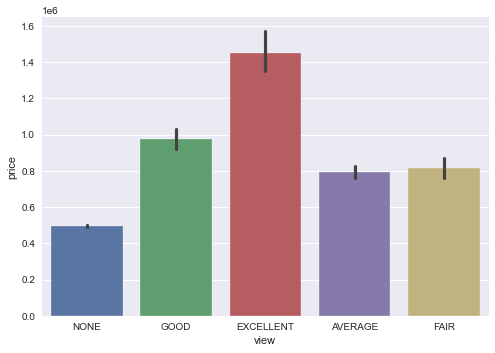

In [324]:
sns.barplot(x = 'view', y = 'price', data=data)

In [325]:
data['view'].fillna('NONE', inplace=True)

In [326]:
data['view']=data['view'].apply(lambda x: 0 if x== 'NONE' else 1)

In [327]:
data['view'].value_counts()

0    19485
1     2112
Name: view, dtype: int64

### Year Built

In [328]:
data['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [329]:
data['yr_built']=data['yr_built'].apply(lambda x: 0 if x> 1980 else 1)

In [330]:
data['yr_built'].value_counts()

1    12568
0     9029
Name: yr_built, dtype: int64

### Date

In [331]:
data['date'].value_counts()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
8/3/2014       1
1/31/2015      1
11/2/2014      1
8/30/2014      1
5/24/2015      1
Name: date, Length: 372, dtype: int64

In [332]:
date_years = data['date'].apply(lambda x: int(x[-4:]))

In [333]:
date_years.value_counts()

2014    14622
2015     6975
Name: date, dtype: int64

### Grade

Create dummy variables for grade.

In [334]:
data['grade'].value_counts(normalize=True)

7 Average        0.415521
8 Good           0.280826
9 Better         0.121082
6 Low Average    0.094365
10 Very Good     0.052507
11 Excellent     0.018475
5 Fair           0.011205
12 Luxury        0.004121
4 Low            0.001250
13 Mansion       0.000602
3 Poor           0.000046
Name: grade, dtype: float64

In [335]:
grade_dummies = pd.get_dummies(data['grade'], prefix='grd', drop_first=True)

In [336]:
data = data.drop(['grade'], axis=1)

In [337]:
data = pd.concat([data, grade_dummies], axis=1)
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grd_11 Excellent,grd_12 Luxury,grd_13 Mansion,grd_3 Poor,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,...,0,0,0,0,0,0,0,0,1,0


### Condition

Create dummy variables for condition.

In [338]:
data['condition'].value_counts(normalize=True)

Average      0.649164
Good         0.262861
Very Good    0.078761
Fair         0.007871
Poor         0.001343
Name: condition, dtype: float64

In [339]:
condition_dummies = pd.get_dummies(data['condition'], prefix='cnd', drop_first=True)

In [340]:
data = data.drop(['condition'], axis=1)

In [341]:
data = pd.concat([data, condition_dummies], axis=1)
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,...,0,0,0,0,1,0,0,0,0,0


### Drop columns which are not needed

Drop columns which will not be used in the model.  These columns include id, date, zipcode, lat, and long

In [342]:
data.drop(columns=['id', 'index', 'date', 'zipcode', 'lat', 'long'],
        inplace=True)

# Visualizing Distributions

### Histograms

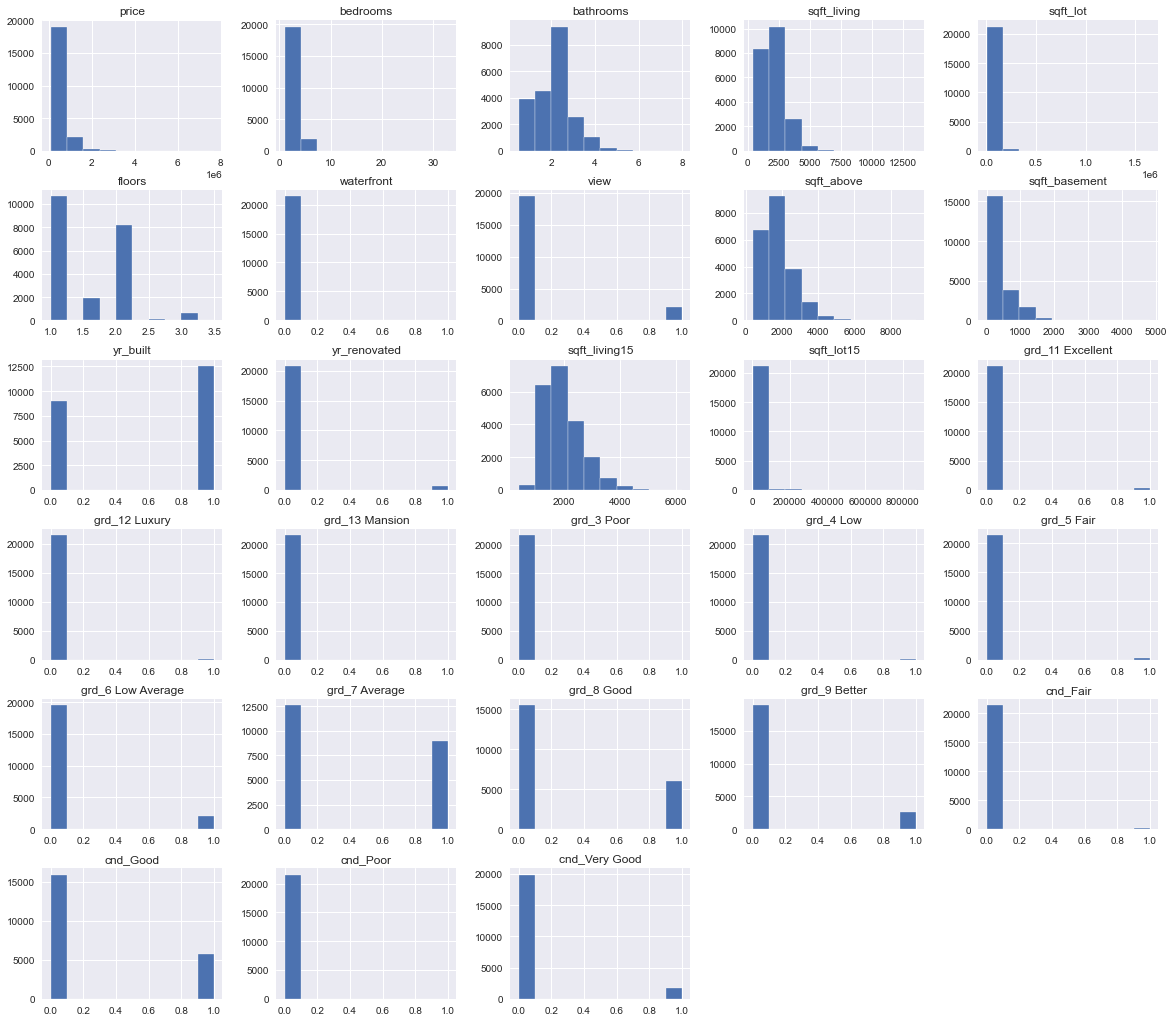

In [343]:
data.hist(figsize = (20, 18));

### Check for Linearity

Checking for linearity between price and the squarefeet of living space.  sqft_living seems to have a linear relationship with list_price.

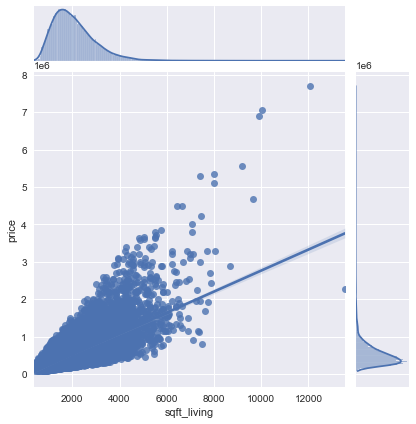

In [344]:
sns.jointplot('sqft_living', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

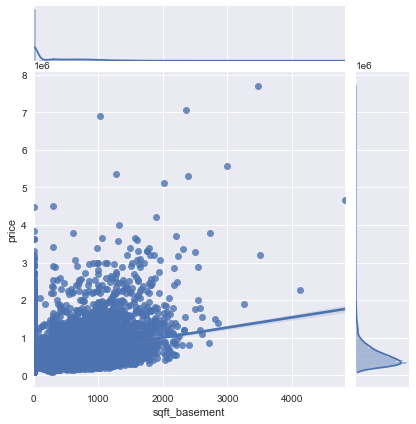

In [345]:
sns.jointplot('sqft_basement', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and the amount of floors.  Seems that price and floors has a slight linear relationship.

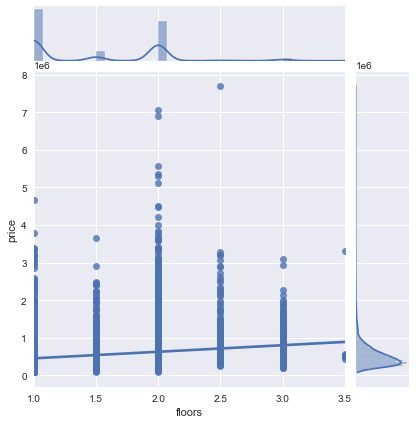

In [346]:
sns.jointplot('floors', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and bathrooms.  Bathrooms and price have a linear relationship.

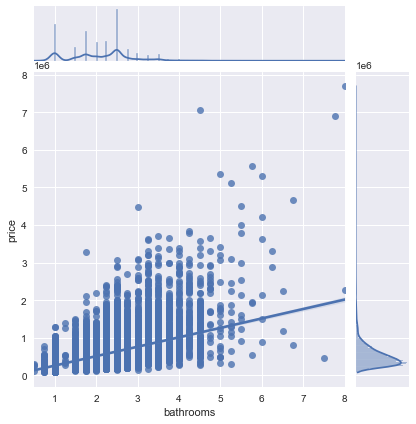

In [347]:
sns.jointplot('bathrooms', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

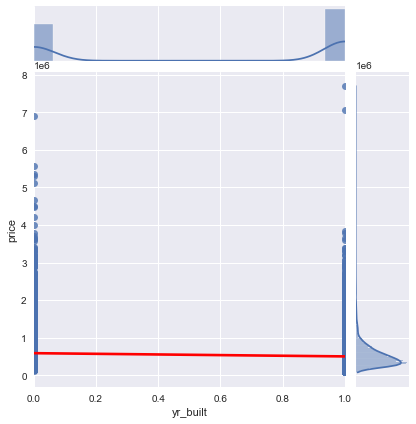

In [348]:
g = sns.jointplot('yr_built', 'price', data=data, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
plt.style.use('seaborn')
sns.set_style("darkgrid")

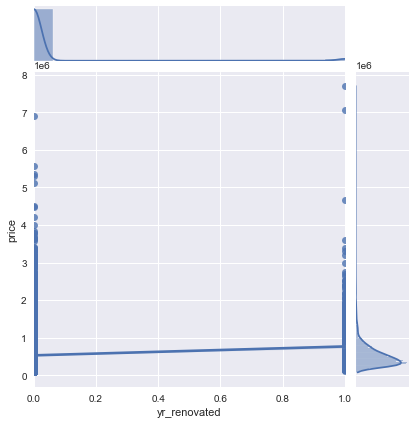

In [349]:
sns.jointplot('yr_renovated', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

### Check for Multicolinearity

<AxesSubplot:>

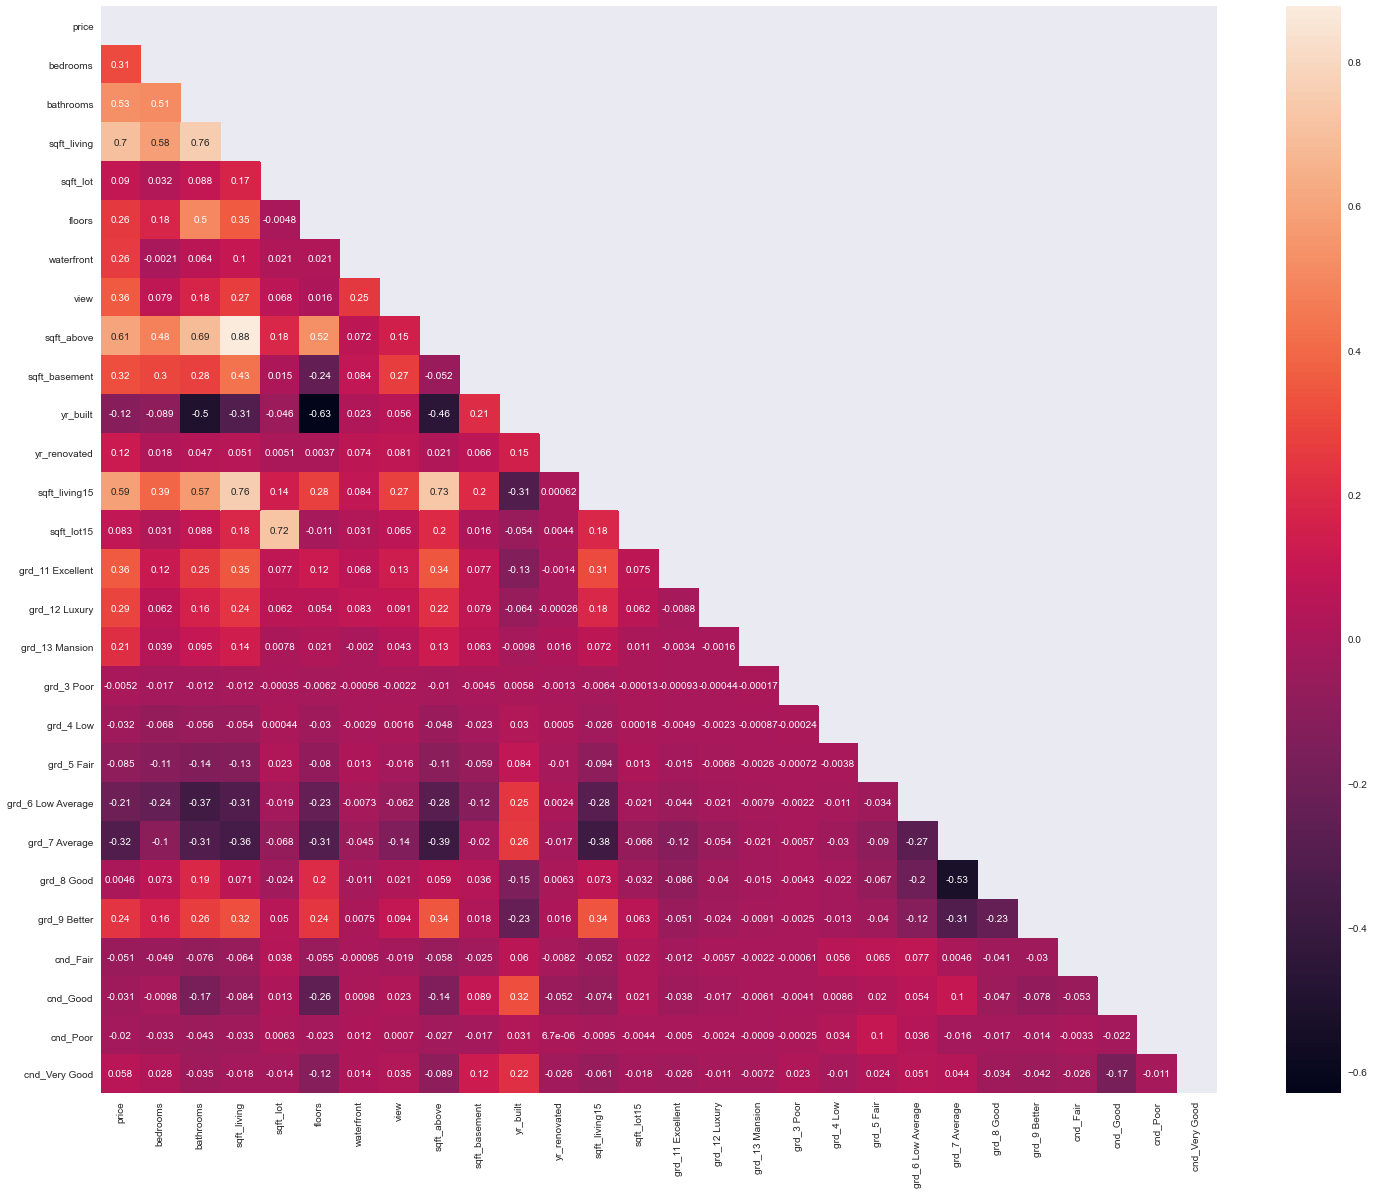

In [350]:
corr = data.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
plt.figure(figsize=(25,20))
sns.heatmap(corr, mask = trimask, annot = True)

# Modeling

### Create Baseline Model

In [351]:
y = data['price']

x = data.drop(columns=['price'])

In [352]:
model_data = x

In [353]:
import statsmodels.api as sm

model_data_int=sm.add_constant(model_data)
baseline_model=sm.OLS(y,model_data_int).fit()
results=baseline_model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     1593.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:27:12   Log-Likelihood:            -2.9555e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21569   BIC:                         5.914e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.711e+05    1.5e+04     24.783      0.000    3.42e+05       4e+05
bedrooms          -2.823e+04   2064.966    -13.669      0.000   -3.23e+04   -2.42e+04
bathrooms          2.997e+04   3447.281      8.693      0.000    2.32e+04    3.67e+04
sqft_living         109.7474     22.396      4.900      0.000      65.850     153.644
sqft_lot              0.0196      0.050      0.387      0.698      -0.079       0.118
floors             6.649e+04   3996.281     16.637      0.000    5.87e+04    7.43e+04
waterfront         6.426e+05   1.83e+04     35.019      0.000    6.07e+05    6.79e+05
view               1.003e+05   5427.370     18.471      0.000    8.96e+04    1.11e+05
sqft_above           10.1433     22.414      0.453      0.651     -33.790      54.077
sqft_basement        51.4780     22.397      2.298      0.022       7.578      95.378
yr_built           1.418e+05   4563.464     31.084      0.000    1.33e+05    1.51e+05
yr_renovated       9.724e+04   8267.649     11.762      0.000     8.1e+04    1.13e+05
sqft_living15        29.4239      3.582      8.214      0.000      22.402      36.446
sqft_lot15           -0.6384      0.077     -8.283      0.000      -0.790      -0.487
grd_11 Excellent   2.781e+05   1.26e+04     22.007      0.000    2.53e+05    3.03e+05
grd_12 Luxury      7.713e+05   2.41e+04     32.013      0.000    7.24e+05    8.18e+05
grd_13 Mansion         2e+06   6.04e+04     33.120      0.000    1.88e+06    2.12e+06
grd_3 Poor        -4.937e+05   2.13e+05     -2.320      0.020   -9.11e+05   -7.66e+04
grd_4 Low         -4.915e+05   4.22e+04    -11.636      0.000   -5.74e+05   -4.09e+05
grd_5 Fair        -4.869e+05    1.7e+04    -28.718      0.000    -5.2e+05   -4.54e+05
grd_6 Low Average -4.517e+05   1.07e+04    -42.162      0.000   -4.73e+05   -4.31e+05
grd_7 Average     -4.036e+05   8914.350    -45.277      0.000   -4.21e+05   -3.86e+05
grd_8 Good        -3.345e+05   8041.963    -41.599      0.000    -3.5e+05   -3.19e+05
grd_9 Better      -1.903e+05   7812.639    -24.363      0.000   -2.06e+05   -1.75e+05
cnd_Fair          -1.626e+04   1.66e+04     -0.980      0.327   -4.88e+04    1.63e+04
cnd_Good           2.546e+04   3667.277      6.943      0.000    1.83e+04    3.27e+04
cnd_Poor          -3762.5770   3.98e+04     -0.094      0.925   -8.18e+04    7.43e+04
cnd_Very Good       8.78e+04   5806.939     15.119      0.000    7.64e+04    9.92e+04
==============================================================================
Omnibus:                    11997.955   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           383049.162
Skew:                           2.097   Prob(JB):                         0.00
Kurtosis:                      23.201   Cond. No.                     7.44e+06
======================

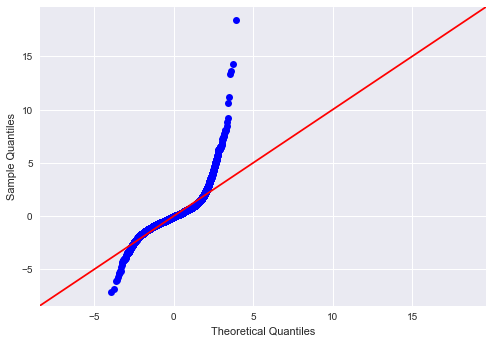

In [354]:
import scipy.stats as stats

fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

### Second Model Dropping Features

In [356]:
x_2 = data.drop(columns=['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'grd_3 Poor',
                      'cnd_Fair', 'cnd_Poor'])

In [357]:
model_data_2 = x_2

In [358]:
model_data_int_2=sm.add_constant(model_data_2)
second_model=sm.OLS(y,model_data_int_2).fit()
results=second_model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2036.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:29:42   Log-Likelihood:            -2.9560e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21575   BIC:                         5.914e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.627e+05    1.5e+04     24.239      0.000    3.33e+05    3.92e+05
bedrooms            -2.9e+04   2066.519    -14.031      0.000    -3.3e+04   -2.49e+04
bathrooms          3.457e+04   3414.034     10.127      0.000    2.79e+04    4.13e+04
sqft_living         135.0364      3.635     37.145      0.000     127.911     142.162
floors              5.36e+04   3719.706     14.410      0.000    4.63e+04    6.09e+04
waterfront         6.432e+05   1.84e+04     34.995      0.000    6.07e+05    6.79e+05
view               1.089e+05   5349.707     20.348      0.000    9.84e+04    1.19e+05
yr_built           1.472e+05   4521.901     32.560      0.000    1.38e+05    1.56e+05
yr_renovated       9.636e+04   8280.246     11.637      0.000    8.01e+04    1.13e+05
sqft_living15        23.7310      3.520      6.742      0.000      16.831      30.631
sqft_lot15           -0.6695      0.055    -12.214      0.000      -0.777      -0.562
grd_11 Excellent    2.72e+05   1.26e+04     21.519      0.000    2.47e+05    2.97e+05
grd_12 Luxury      7.606e+05   2.41e+04     31.557      0.000    7.13e+05    8.08e+05
grd_13 Mansion     1.976e+06   6.04e+04     32.704      0.000    1.86e+06    2.09e+06
grd_4 Low         -4.825e+05   4.22e+04    -11.431      0.000   -5.65e+05      -4e+05
grd_5 Fair        -4.791e+05   1.69e+04    -28.411      0.000   -5.12e+05   -4.46e+05
grd_6 Low Average -4.434e+05   1.07e+04    -41.509      0.000   -4.64e+05   -4.22e+05
grd_7 Average     -3.931e+05   8855.270    -44.391      0.000    -4.1e+05   -3.76e+05
grd_8 Good        -3.241e+05   7976.137    -40.631      0.000    -3.4e+05   -3.08e+05
grd_9 Better      -1.853e+05   7806.959    -23.731      0.000   -2.01e+05    -1.7e+05
cnd_Good           2.594e+04   3654.800      7.097      0.000    1.88e+04    3.31e+04
cnd_Very Good      9.027e+04   5794.456     15.579      0.000    7.89e+04    1.02e+05
==============================================================================
Omnibus:                    11801.350   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           363208.974
Skew:                           2.059   Prob(JB):                         0.00
Kurtosis:                      22.664   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

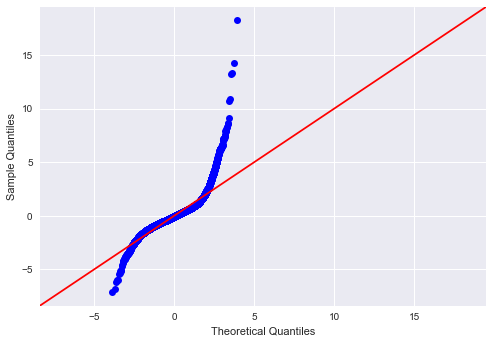

In [359]:
fig = sm.graphics.qqplot(second_model.resid, dist=stats.norm, line='45', fit=True)

### Remodeling with price log transformation

Run a log function to change the structure of price to make it normally distirbuted.

In [360]:
p = np.log(data.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

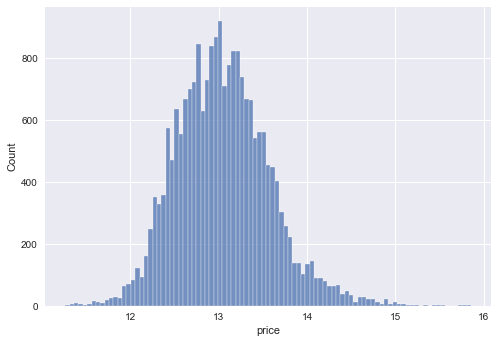

In [361]:
sns.histplot(p)

In [362]:
y_log = p

In [363]:
third_model=sm.OLS(y_log,model_data_int_2).fit()
results=third_model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     1692.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:29:48   Log-Likelihood:                -6282.5
No. Observations:               21597   AIC:                         1.261e+04
Df Residuals:                   21575   BIC:                         1.278e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.6547      0.023    555.956      0.000      12.610      12.699
bedrooms             -0.0341      0.003    -10.836      0.000      -0.040      -0.028
bathrooms             0.0441      0.005      8.494      0.000       0.034       0.054
sqft_living           0.0002   5.53e-06     29.584      0.000       0.000       0.000
floors                0.1077      0.006     19.040      0.000       0.097       0.119
waterfront            0.4071      0.028     14.561      0.000       0.352       0.462
view                  0.1499      0.008     18.419      0.000       0.134       0.166
yr_built              0.2257      0.007     32.810      0.000       0.212       0.239
yr_renovated          0.1273      0.013     10.108      0.000       0.103       0.152
sqft_living15      8.841e-05   5.36e-06     16.510      0.000    7.79e-05    9.89e-05
sqft_lot15        -5.394e-07   8.34e-08     -6.469      0.000   -7.03e-07   -3.76e-07
grd_11 Excellent      0.1189      0.019      6.186      0.000       0.081       0.157
grd_12 Luxury         0.2332      0.037      6.360      0.000       0.161       0.305
grd_13 Mansion        0.3325      0.092      3.617      0.000       0.152       0.513
grd_4 Low            -1.0909      0.064    -16.987      0.000      -1.217      -0.965
grd_5 Fair           -0.9639      0.026    -37.573      0.000      -1.014      -0.914
grd_6 Low Average    -0.7681      0.016    -47.266      0.000      -0.800      -0.736
grd_7 Average        -0.5521      0.013    -40.984      0.000      -0.579      -0.526
grd_8 Good           -0.3644      0.012    -30.035      0.000      -0.388      -0.341
grd_9 Better         -0.1572      0.012    -13.234      0.000      -0.180      -0.134
cnd_Good              0.0428      0.006      7.696      0.000       0.032       0.054
cnd_Very Good         0.1602      0.009     18.176      0.000       0.143       0.177
==============================================================================
Omnibus:                       23.784   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.841
Skew:                          -0.081   Prob(JB):                     6.65e-06
Kurtosis:                       3.003   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

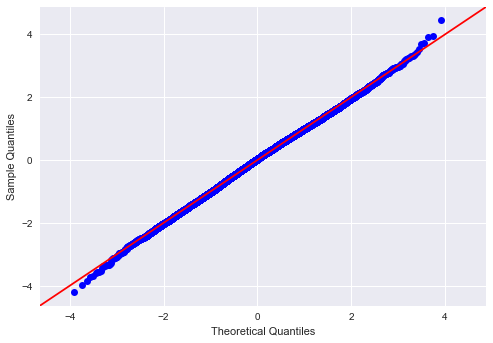

In [364]:
fig = sm.graphics.qqplot(third_model.resid, dist=stats.norm, line='45', fit=True)

### Remodeling After checking Multicolinearity

In [ ]:
data.corr()

In [ ]:
abs(data.corr()) > 0.75

In [ ]:
data = data.corr().abs().stack().reset_index().sort_values(0, ascending = False)

data['pairs'] = list(zip(data.level_0, data.level_1))

data.set_index(['pairs'], inplace = True)

data.drop(columns=['level_1', 'level_0'], inplace = True)

data.columns = ['cc']

data.drop_duplicates(inplace=True)

data[(data.cc>.75) & (data.cc<1)]

In [ ]:
features_3 = ['sqft_living', 'bedrooms', 'floors', 'sqft_lot', 'yr_built',
           'yr_renovated', 'waterfront', 'view', 'sqft_living15']

In [ ]:
features_4 = ['sqft_living', 'bedrooms', 'floors', 'sqft_lot', 'yr_built',
           'yr_renovated', 'waterfront', 'view', 'sqft_living15']

In [ ]:
model_data4 = data.loc[:, features_4]